# Evaluation de l'enseignement prioritaire

L’éducation prioritaire en France constitue une politique cruciale visant à réduire les inégalités sociales et à améliorer les performances académiques des élèves issus de milieux défavorisés. Cette initiative a été soumise à une évaluation en 2016 par la Cour des comptes, dont les résultats ont souligné des écarts significatifs dans les performances scolaires entre les élèves bénéficiant de cette politique et leurs pairs hors éducation prioritaire.

Depuis cette évaluation, plusieurs réformes ont été introduites, incitant à revisiter l'impact et l'efficacité de cette politique. Dans cette perspective, une nouvelle évaluation est envisagée pour analyser la répartition géographique des établissements classés en éducation prioritaire ainsi que l'impact de ce statut sur les résultats scolaires des élèves.

Cette note vise à exploiter les données disponibles , à explorer diverses approches méthodologiques, tout en identifiant les limites inhérentes à ce type d'étude. Les premiers résultats préliminaires visent à apporter des éléments de réponse aux questions clés : la distribution des établissements en éducation prioritaire est-elle uniforme à travers le territoire (I), et quel est l’impact de ce classement sur les performances scolaires des élèves (II).


Sources des données et metadonnées : 

- Adresse et géolocalisation des établissements d'enseignement du premier et second degrés : https://www.data.gouv.fr/fr/datasets/adresse-et-geolocalisation-des-etablissements-denseignement-du-premier-et-second-degres-1/
- Collèges éducation prioritaire (« REP » ou « REPPLUS ») : https://www.data.gouv.fr/fr/datasets/colleges-education-prioritaire/#/resources
et https://data.education.gouv.fr/explore/dataset/fr-en-colleges-ep/table/?disjunctive.rs&disjunctive.appartep
- Diplôme national du brevet par établissement : https://www.data.gouv.fr/fr/datasets/diplome-national-du-brevet-par-etablissement-1/
- Indicateurs de valeur ajoutée des collèges : https://www.data.gouv.fr/fr/datasets/indicateurs-de-valeur-ajoutee-des-colleges/
- Indices de position sociale dans les collèges (2022) : https://www.data.gouv.fr/fr/datasets/indices-de-position-sociale-dans-les-colleges-a-partir-de-2022/


Requirements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import statsmodels.api as sm


Importation des données

In [2]:
#Adresse et géolocalisation des établissements d'enseignement du premier et second degrés
loc_colleges = pd.read_csv('donnees/fr-en-adresse-et-geolocalisation-etablissements-premier-et-second-degre.csv', sep=';')

# Collèges éducation prioritaire (« REP » ou « REPPLUS »)
c_EP = pd.read_csv('donnees/fr-en-colleges-ep.csv', sep=';')

# Diplôme national du brevet par établissement
brevet = pd.read_csv('donnees/fr-en-dnb-par-etablissement.csv', sep=';')

# Indicateurs de valeur ajoutée des collèges
iva = pd.read_csv('donnees/fr-en-indicateurs-valeur-ajoutee-colleges.csv', sep=';')

# Indices de position sociale dans les collèges (2022)
ips = pd.read_csv('donnees/fr-en-ips-colleges-ap2022.csv', sep=';')
ips.set_index('uai', inplace=True)


# I.	Répartition territoriale

La répartition territoriale des collèges en « éducation prioritaire » en France constitue un aspect crucial pour évaluer l'équité dans le système éducatif. Cette section explore les indicateurs clés et la méthodologie utilisée pour analyser cette répartition, ainsi que des analyses préliminaires démontrant la distribution actuelle des établissements. En outre, elle aborde les limites à prendre en considération concernant les méthodes proposées.

### A.	Indicateurs et méthode

Pour évaluer l’homogénéité de la répartition géographique des collèges en « éducation prioritaire », il est important d’analyser non seulement le nombre et la part de ces collèges par académie, mais aussi leur distribution sur l’ensemble du territoire.
Pour analyser plus en profondeur cette hétérogénéité, il est pertinent de calculer des indices de dispersion et de concentration, tels que l’indice de Gini.
Les indicateurs clés identifiés pour permettre ces analyses sont :
-	Nombre de collèges par académie par groupe d’appartenance sur l’année 2019  ;
-	Nombre de collégiens par académie par groupe d’appartenance sur l’année 2019.


### B.	Analyses préliminaires 
1.	Analyses descriptives 

En 2019, 21% des collèges en France sont classés en « éducation prioritaire ». Cette proportion est similaire pour le nombre d’élèves inscrits dans ces collèges.


In [3]:
#Renommer colonne de correspondance 
c_EP = c_EP.rename(columns={"uai": "numero_uai"})

#Jointure des collèges avec adresse et géolocalisation
c_EP_loc = c_EP.merge(loc_colleges, how='left', on='numero_uai')
c_EP_loc.head()


#selection des variables nécessaires
    #appartep : Appartenance à un groupe d'établissements relevant de l'éducation prioritaire ou non (HEP) à la rentrée scolaire
    #rs : Rentrée scolaire N (correspond à l'année scolaire N/N+1)
    #nbeleves : Effectif d'élèves de l'établissement à la rentrée scolaire N
c_EP_loc_1 = c_EP_loc[['numero_uai','id','rs','appartep','nbeleves','acadn','dept','libelle_departement','latitude_y', 'longitude_y','zonage3']]
c_EP_loc_1

c_EP_loc_1.set_index('numero_uai', inplace=True)

#Filtre pour les analyses à la rentrée scolaire de 2019
c_EP_loc_1_19 = c_EP_loc_1[c_EP_loc_1['rs'] == 2019]
c_EP_loc_1_19

#Création du tableau croisé dynamique avec la somme de 'nbeleves' et le comptage de 'id' par 'appartep'
id_appartep = pd.pivot_table(c_EP_loc_1_19, values=['id', 'nbeleves'], index='appartep', aggfunc={'id': 'count', 'nbeleves': 'sum'}, fill_value=0)

#Ajout des totaux sur les lignes et les colonnes
id_appartep['%_id'] = id_appartep['id'] / id_appartep['id'].sum()
id_appartep['%_nbeleves'] = id_appartep['nbeleves'] / id_appartep['nbeleves'].sum()
id_appartep.loc['Total'] = id_appartep.sum(axis=0)

#Renommer les colonnes
id_appartep.rename(columns={
    'id': 'Nombre de collèges',
    'nbeleves': 'Effectifs de collégiens',
    '%_id': 'Part des collèges',
    '%_nbeleves': 'Part des effectifs'
}, inplace=True)
id_appartep

,Nombre de collèges,Effectifs de collégiens,Part des collèges,Part des effectifs
appartep,,,,
HEP,4195.0,2084212.0,0.793156,0.785494
REP,730.0,378036.0,0.138022,0.142474
REPPLUS,364.0,191128.0,0.068822,0.072032
Total,5289.0,2653376.0,1.000000,1.000000


In [4]:
#Nombre établissements par appartenance par rentrée scolaire
id_acadn_appartep = pd.pivot_table(c_EP_loc_1, values='id', index='acadn', columns=['rs', 'appartep'], aggfunc='count', fill_value=0)
id_acadn_appartep.head()

rs              2011            2012            2013            2014  ...  \
appartep      ECLAIR  HEP RRS ECLAIR  HEP RRS ECLAIR  HEP RRS ECLAIR  ...   
acadn                                                                 ...   
AIX-MARSEILLE     29  145  36     29  144  36     29  145  36     19  ...   
AMIENS            17  135  21     17  135  21     17  135  21     11  ...   
BESANCON           3   95  14      3   94  14      3   94  13      2  ...   
BORDEAUX           3  209  41      2  211  41      2  212  41      1  ...   
CAEN               3  136   9      3  136   9      2  136   9      1  ...   

rs               2016 2017             2018             2019              
appartep      REPPLUS  HEP REP REPPLUS  HEP REP REPPLUS  HEP REP REPPLUS  
acadn                                                                     
AIX-MARSEILLE      33  148  29      33  148  29      33  148  29      33  
AMIENS             13  130  30      13  130  30      13  130  30      13  
BESANCON            4   92  12       4   92  12       4   91  12       4  
BORDEAUX            3  224  31       3  224  31       3  224  31       3  
CAEN                3  129  12       3  128  11       3  128  11       3  

[5 rows x 28 columns]

In [5]:
#Nombre établissements par appartenance pour la rentrée scolaire de 2019
id_acadn_appartep_19 = pd.pivot_table(c_EP_loc_1_19, values='id', index='acadn', columns='appartep', aggfunc='count', fill_value=0)
id_acadn_appartep_19.head()

appartep,HEP,REP,REPPLUS
acadn,,,
AIX-MARSEILLE,148,29,33
AMIENS,130,30,13
BESANCON,91,12,4
BORDEAUX,224,31,3
CAEN,128,11,3


In [6]:
#Effectif de collégiens par academie et par appartenance à un groupe d'établissements par rentrée scolaire
nbeleves_acadn_appartep = pd.pivot_table(c_EP_loc_1, values='nbeleves', index='acadn', columns=['rs', 'appartep'], aggfunc='sum', fill_value=0)
nbeleves_acadn_appartep.head()

rs              2011                  2012                  2013          \
appartep      ECLAIR     HEP    RRS ECLAIR     HEP    RRS ECLAIR     HEP   
acadn                                                                      
AIX-MARSEILLE  13240   82623  18171  13093   82146  18809  13034   82070   
AMIENS          8317   64533  10468   8474   65718  10621   8516   65958   
BESANCON        1327   40697   5602   1357   41035   5546   1370   41201   
BORDEAUX         976  105338  16785    759  107085  17045    811  107612   
CAEN             884   51651   3367    834   52178   3389    666   52133   

rs                     2014  ...    2016    2017                   2018  \
appartep         RRS ECLAIR  ... REPPLUS     HEP    REP REPPLUS     HEP   
acadn                        ...                                          
AIX-MARSEILLE  18730   8521  ...   14977   82491  15223   15246   83489   
AMIENS         10617   5661  ...    6400   60704  14738    6315   60731   
BESANCON        5660    764  ...    1931   39367   6451    2035   39295   
BORDEAUX       17265    334  ...    1151  110201  14191    1219  111663   
CAEN            3268    393  ...     865   48675   3349     906   48560   

rs                              2019                 
appartep         REP REPPLUS     HEP    REP REPPLUS  
acadn                                                
AIX-MARSEILLE  15551   15717   84629  15951   16357  
AMIENS         14771    6509   61043  14850    6641  
BESANCON        6553    2061   39411   6599    2114  
BORDEAUX       14733    1214  113016  14964    1303  
CAEN            3126     899   48584   3141     941  

[5 rows x 28 columns]

In [7]:
# Effectif de collégiens par academie et par appartenance à un groupe d'établissements pour la rentrée scolaire de 2019
nbeleves_acadn_appartep_19 = pd.pivot_table(c_EP_loc_1_19, values='nbeleves', index='acadn', columns= 'appartep', aggfunc='sum', fill_value=0)
nbeleves_acadn_appartep_19.head()

appartep,HEP,REP,REPPLUS
acadn,,,
AIX-MARSEILLE,84629,15951,16357
AMIENS,61043,14850,6641
BESANCON,39411,6599,2114
BORDEAUX,113016,14964,1303
CAEN,48584,3141,941


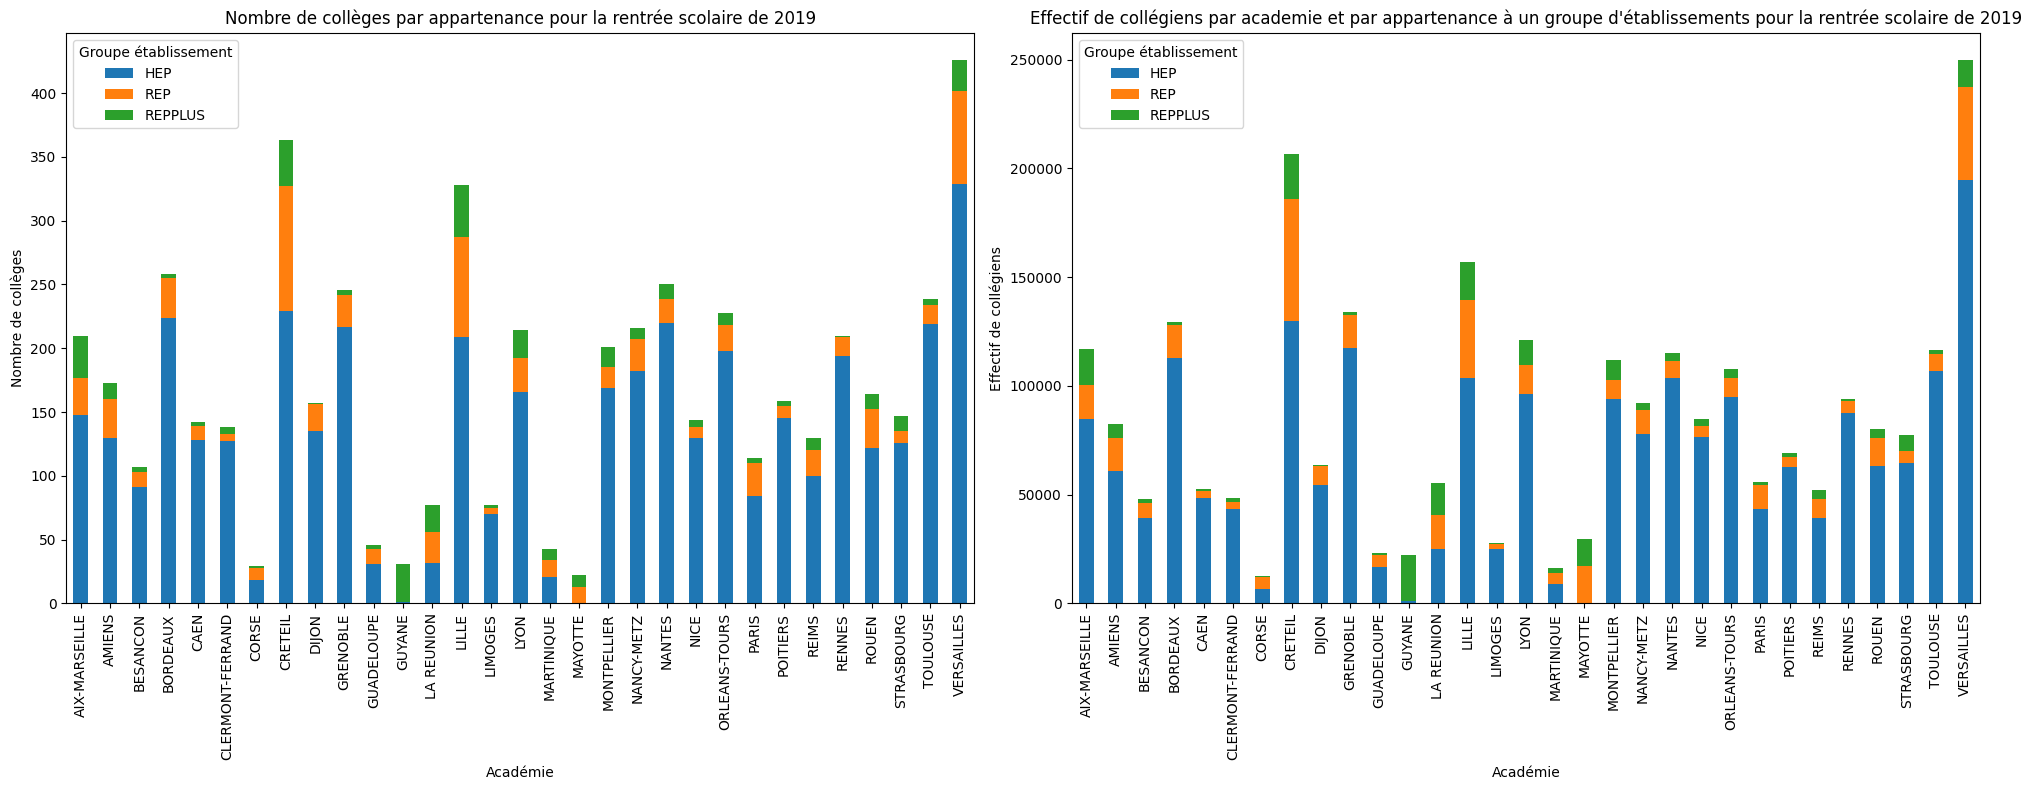

In [8]:
#Configuration graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

#Graphique pour le nombre d'établissements
id_acadn_appartep_19.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_xlabel('Académie')
ax1.set_ylabel('Nombre de collèges')
ax1.set_title('Nombre de collèges par appartenance pour la rentrée scolaire de 2019')
ax1.legend(title='Groupe établissement')

#Graphique pour l'effectif de collégiens
nbeleves_acadn_appartep_19.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_xlabel('Académie')
ax2.set_ylabel('Effectif de collégiens')
ax2.set_title('Effectif de collégiens par academie et par appartenance à un groupe d\'établissements pour la rentrée scolaire de 2019')
ax2.legend(title='Groupe établissement')
plt.tight_layout()
plt.show()

In [9]:
#Part des effectifs de collégiens en REP ou REPPLUS pour la rentrée scolaire de 2019

#Création du tableau croisé dynamique pour les effectifs et les collèges
rep_share = pd.pivot_table(
    c_EP_loc_1_19, 
    values=['id', 'nbeleves'], 
    index=['acadn'], 
    columns=['appartep'], 
    aggfunc={'id': 'count', 'nbeleves': 'sum'}, 
    fill_value=0
)

#REP et REPPLUS en une seule catégorie REP
rep_share['id', 'REP'] = rep_share['id', 'REP'] + rep_share['id', 'REPPLUS']
rep_share['nbeleves', 'REP'] = rep_share['nbeleves', 'REP'] + rep_share['nbeleves', 'REPPLUS']
rep_share = rep_share.drop(columns=[('id', 'REPPLUS'), ('nbeleves', 'REPPLUS')])

#Parts des effectifs et des collèges
rep_share['part_colleges_REP'] = rep_share['id', 'REP'] / rep_share['id'].sum(axis=1)
rep_share['part_colleges_HEP'] = rep_share['id', 'HEP'] / rep_share['id'].sum(axis=1)
rep_share['part_effectifs_REP'] = rep_share['nbeleves', 'REP'] / rep_share['nbeleves'].sum(axis=1)
rep_share['part_effectifs_HEP'] = rep_share['nbeleves', 'HEP'] / rep_share['nbeleves'].sum(axis=1)

#Renommer les colonnes
rep_share.columns = ['_'.join(col).strip() for col in rep_share.columns.values]
rep_share = rep_share[['id_REP', 'id_HEP', 'nbeleves_REP', 'nbeleves_HEP', 'part_colleges_REP_', 'part_colleges_HEP_', 'part_effectifs_REP_', 'part_effectifs_HEP_']]
rep_share.columns = [
    'Nombre de collèges REP', 
    'Nombre de collèges hors REP', 
    'Effectif de collégiens REP', 
    'Effectif de collégiens hors REP', 
    'Part des collèges REP', 
    'Part des collèges hors REP', 
    'Part des effectifs REP', 
    'Part des effectifs hors REP'
]

In [10]:
#Statistiques de distribution
columns_to_summarize = ['Nombre de collèges REP', 
    'Nombre de collèges hors REP', 
    'Effectif de collégiens REP', 
    'Effectif de collégiens hors REP']

summary_dict = {
    'Minimum': [],
    'Quartile 1': [],
    'Médiane': [],
    'Moyenne': [],
    'Quartile 3': [],
    'Maximum': []
    }

#Statistiques pour chaque colonne
for col in columns_to_summarize:
    summary_dict['Minimum'].append(rep_share[col].min())
    summary_dict['Quartile 1'].append(rep_share[col].quantile(0.25))
    summary_dict['Médiane'].append(rep_share[col].median())
    summary_dict['Moyenne'].append(rep_share[col].mean())
    summary_dict['Quartile 3'].append(rep_share[col].quantile(0.75))
    summary_dict['Maximum'].append(rep_share[col].max())

summary_df = pd.DataFrame(summary_dict, index=columns_to_summarize)
summary_df

,Minimum,Quartile 1,Médiane,Moyenne,Quartile 3,Maximum
Nombre de collèges REP,7,16.0,30.0,35.290323,38.0,134
Nombre de collèges hors REP,0,87.5,130.0,135.322581,196.0,329
Effectif de collégiens REP,3102,7958.0,12791.0,18360.129032,21274.0,76794
Effectif de collégiens hors REP,0,39358.5,62992.0,67232.645161,95499.5,194779


Le nombre de collèges en REP par académie varie considérablement, allant de 7 à 134. La moyenne (35,29) et la médiane (30) étant proches indiquent une répartition générale équilibrée. Cependant, les quartiles révèlent une grande variabilité : 25% des académies ont moins de 16 collèges en REP, 50% en ont entre 16 et 38, et 25% en ont plus de 38. Cette diversité suggère une distribution hétérogène, avec des extrêmes marqués.

A l’aide de ces informations, il est possible d’identifier que 35% des académies ont plus de 25 % de leurs collèges en éducation prioritaire, notamment en Corse, à Aix-Marseille, Paris, Créteil, Rouen, Lille et les départements d’outre-mer. Ces académies scolarisent 51% des collégiens, tandis que 5 académies ont moins de 10% de collèges en REP (Limoges, Poitiers, Toulouse, Clermont-Ferrand, et Rennes), représentant seulement 5% des collégiens.

Ces analyses pourraient bénéficier d'une analyse temporelle pour comprendre les tendances et les changements structurels dans la répartition des collèges et des collégiens en REP au fil du temps. Des représentations cartographiques thématiques pourraient également enrichir la compréhension de la géographie de l'éducation prioritaire.


# 2.	Indices de dispersion

L'analyse de la répartition des collèges REP entre les académies peut être éclairée par l'utilisation de l'indice de Gini, une mesure allant de 0 à 1 qui évalue l'égalité de cette répartition. Une valeur de 0 correspond à une répartition parfaitement égale où toutes les unités (ici, les académies) détiennent la même part de la variable mesurée (nombre de collèges REP). Une valeur de 1 indique une inégalité maximale, où une seule unité possède toute la variable mesurée.
Un premier calcul de l’indice de Gini pour la répartition des collèges REP donne un résultat de 0.968, témoignant ainsi d’une répartition inégale des collèges REP entre les académies. Ce résultat peut être complété de manière utile par une représentation graphique à l’aide de la Courbe de Lorenz.


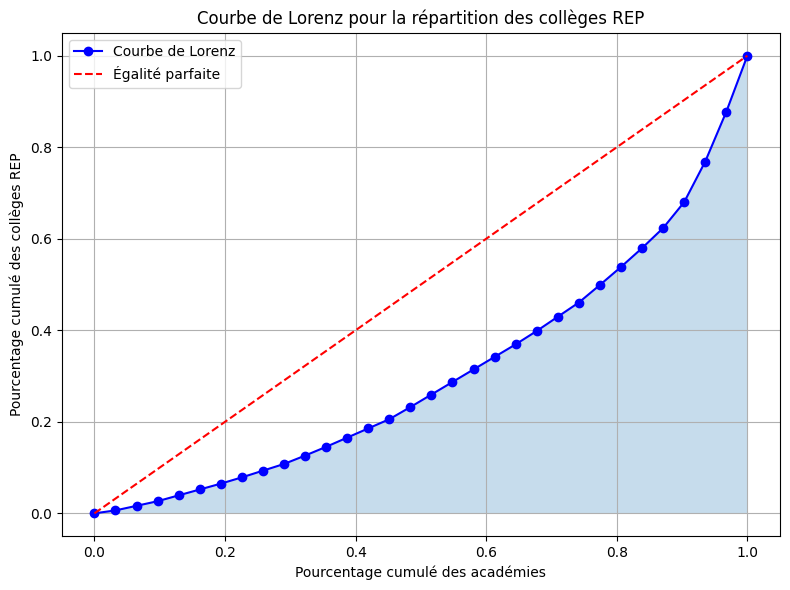

In [11]:
#Indice Gini pour analyse de la répartition du nombre des collèges REP
nombre_colleges_rep = rep_share['Nombre de collèges REP']

nombre_colleges_rep = np.sort(nombre_colleges_rep)

#Distribution cumulative
n = len(nombre_colleges_rep)
total_colleges = np.sum(nombre_colleges_rep)
cumulative_colleges = np.cumsum(nombre_colleges_rep)
lorenz_curve = cumulative_colleges / total_colleges

#Courbe de Lorenz, point de départ
lorenz_curve = np.insert(lorenz_curve, 0, 0)

#Points pour la ligne de 45 degrés (égalité parfaite)
equal_distribution = np.linspace(0, 1, n+1)

#Tracer la courbe de Lorenz
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(0, 1, n+1), lorenz_curve, marker='o', linestyle='-', color='b', label='Courbe de Lorenz')
plt.plot(np.linspace(0, 1, n+1), equal_distribution, linestyle='--', color='r', label='Égalité parfaite')
plt.fill_between(np.linspace(0, 1, n+1), lorenz_curve, alpha=0.25)

#Mise en page 
plt.title('Courbe de Lorenz pour la répartition des collèges REP')
plt.xlabel('Pourcentage cumulé des académies')
plt.ylabel('Pourcentage cumulé des collèges REP')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [12]:
#L'indice de Gini
areas = []
for i in range(n):
    area = (lorenz_curve[i] + lorenz_curve[i+1]) * (nombre_colleges_rep[i]) / 2
    areas.append(area)

area_under_lorenz = np.sum(areas)

gini_index = 1 - 2 * (area_under_lorenz / (n * total_colleges))

print(f"Indice de Gini pour la répartition des collèges REP : {gini_index:.3f}")

Indice de Gini pour la répartition des collèges REP : 0.968


Sur le graphique, la ligne rouge représente l’égalité parfaite, où chaque académie possède la même proportion de collèges en éducation prioritaire. En revanche, la courbe de Lorenz (ligne bleue) illustre la répartition réelle des collèges REP entre les académies. Une courbe éloignée de la ligne de 45 degrés indique une inégalité significative dans la répartition de cette variable.

## C.	Limites et perspectives

La limite de cette méthode, même si utile pour constater la présence d’hétérogénéité, repose sur le fait qu’une telle mesure ne capture pas toutes les nuances locales ou spécificités régionales qui influencent la répartition des collèges REP. Les analyses purement descriptives, l'indice de Gini et la courbe de Lorenz simplifient la complexité réelle des facteurs qui influencent la répartition des collèges REP, tels que les politiques locales ou le contexte socio-économique des zones d’éducation prioritaire.
Pour une analyse plus approfondie, des techniques d'analyse spatiale comme l'analyse de clusters (regroupements) pourrait compléter ces approches afin d’identifier les concentrations spatiales des collèges en REP. Couplée à des indicateurs de contexte cette méthode permettrait de détecter les zones géographiques spécifiques où la concentration de collèges REP est particulièrement élevée ou faible.


## **

## II.	Analyse d’impact

Cette section examine l'impact du statut « Éducation Prioritaire » sur les performances scolaires en France. Utilisant la méthode des différences en différences (DID) pour évaluer cet impact causal, ainsi qu'une analyse de régression pour explorer les liens entre performances académiques et indice de position sociale (IPS), elle discute aussi des défis méthodologiques et des perspectives d'analyse plus approfondie.

## A.	Indicateurs et méthode

L'utilisation de méthodes économétriques est particulièrement adaptée pour évaluer l'impact du statut « Éducation Prioritaire » sur les performances scolaires des collèges en France. 
L'approche principale sera la méthode des différences en différences (DID), permettant de mesurer l'effet causal de ce classement sur les performances scolaires. En outre, une analyse de régression linéaire sera utilisée pour explorer le lien entre les performances scolaires et l'Indice de Position Sociale (IPS) des élèves.
Les indicateurs analysés couvrent une série de dimensions incluant notamment le contexte socio-économique et les performances scolaires. Parmi ceux-ci figurent les indicateurs de valeur ajoutée, ainsi que l'Indice de Position Sociale (IPS). 


## B.	Analyses préliminaires 
### 1.	Analyses descriptives 


In [13]:
#selection des variables c_EP['appartep'] pour fusion avec les autres bases
c_EP_appartep = c_EP[['numero_uai','appartep']].rename(columns={'numero_uai': 'uai'})
c_EP_appartep.describe()
c_EP_appartep_unique = c_EP_appartep.drop_duplicates(subset='uai')


In [14]:
#Diplôme national du brevet par établissement
brevet = brevet.rename(columns={"numero_d_etablissement": "uai"})

#Jointure brevet avec c_EP
brevet_appartep = pd.merge(brevet,c_EP_appartep_unique, how='left', on='uai')
brevet_appartep = brevet_appartep[['uai','appartep','session','inscrits','presents','admis'	,'admis_sans_mention','nombre_d_admis_mention_ab','admis_mention_bien','admis_mention_tres_bien', 'taux_de_reussite']]

#Supprimer uai sans classification (NaN)
brevet_appartep_clean = brevet_appartep.dropna()


#taux_de_reussite type float
def convert_percentage_to_float(percentage_str):
    return float(percentage_str.replace(',', '.').replace('%', ''))

brevet_appartep_clean['taux_de_reussite'] = brevet_appartep_clean['taux_de_reussite'].apply(convert_percentage_to_float)


/var/folders/3l/d21zqzx14y59bw8rlhhx1ldw0000gn/T/ipykernel_67265/1685954966.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brevet_appartep_clean['taux_de_reussite'] = brevet_appartep_clean['taux_de_reussite'].apply(convert_percentage_to_float)


La performance des collèges en France révèlent des disparités significatives entre ceux hors classement « éducation prioritaire » et ceux classés en REP et REPPLUS. Cela peut être mesuré par le taux de réussite au brevet, la part des admis avec mention très bien, ou bien la valeur ajoutée du taux de réussite.
Les taux de réussite des collèges hors classement « éducation prioritaire » montrent une augmentation progressive sur la période 2006-2021, passant de 78% en 2006 à 88% en 2021.
Les collèges REP et REPPLUS présentent des taux de réussite initialement inférieurs, avec une progression similaire au fil des années : de 62% à 78% pour les collèges REP, et de 68% à 81% pour les collèges REPPLUS.


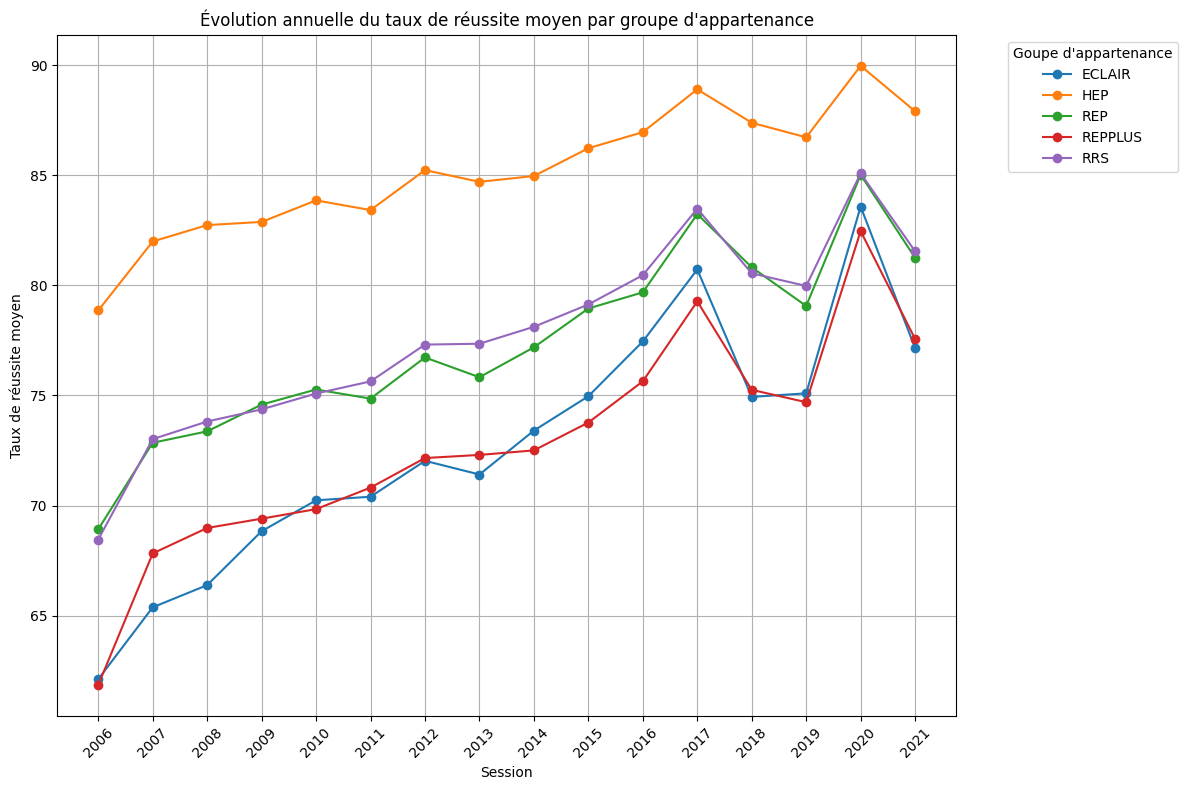

appartep,ECLAIR,HEP,REP,REPPLUS,RRS
session,,,,,
2006,62.108850,78.860109,68.918721,61.847664,68.454381
2007,65.375221,81.996041,72.850228,67.822222,73.015964
2008,66.382301,82.740196,73.368950,68.978802,73.816566
2009,68.832174,82.884154,74.585000,69.401835,74.368373
2010,70.236522,83.862460,75.270000,69.835160,75.087952
2011,70.398291,83.422975,74.857589,70.813901,75.639157
2012,72.029915,85.238354,76.725893,72.156502,77.311145
2013,71.408696,84.705837,75.828285,72.298655,77.350305
2014,73.403509,84.969735,77.187082,72.504505,78.119195


In [15]:
# Calcul du taux de réussite moyen par année et par appartep
taux_reussite_annuel = brevet_appartep_clean.groupby(['session', 'appartep'])['taux_de_reussite'].mean().unstack()

#Graphique évolution annuelle du taux de réussite
plt.figure(figsize=(12, 8))
for appartep in taux_reussite_annuel.columns:
    plt.plot(taux_reussite_annuel.index, taux_reussite_annuel[appartep], marker='o', label=appartep)

plt.title('Évolution annuelle du taux de réussite moyen par groupe d\'appartenance')
plt.xlabel('Session')
plt.ylabel('Taux de réussite moyen')
plt.legend(title='Goupe d\'appartenance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(taux_reussite_annuel.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
taux_reussite_annuel

Les années où des réformes ou des changements majeurs ont eu lieu (par exemple 2015), montrent des augmentations significatives des taux de réussite.
Il est aussi possible d’évaluer la performance scolaire par l’évolution de la part des admis avec mention « très bien ». On constate que la différence est sensible entre les HEP et les REP ou les REPPLUS. Malgré une augmentation globale nationale dès 2016, la distance entre les groupes HEP et REP s’est accentué : une différence de 4,6 points en 2016 contre 8,4 en 2021.


/var/folders/3l/d21zqzx14y59bw8rlhhx1ldw0000gn/T/ipykernel_67265/785650341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brevet_appartep_clean['part_admis_mention_tres_bien'] = brevet_appartep_clean['admis_mention_tres_bien'] / brevet_appartep_clean['admis']


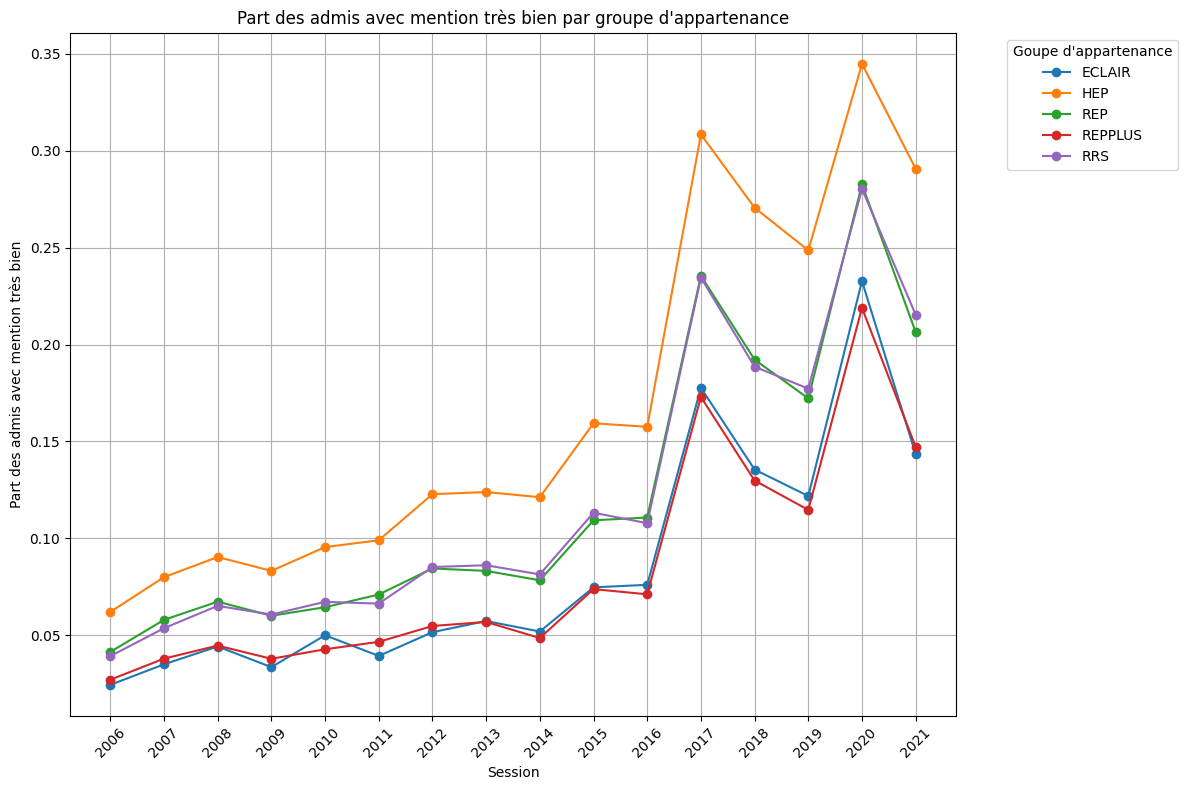

appartep,ECLAIR,HEP,REP,REPPLUS,RRS
session,,,,,
2006,0.024375,0.062005,0.041352,0.027022,0.039179
2007,0.034972,0.079956,0.057914,0.037908,0.053611
2008,0.044160,0.090339,0.067302,0.044632,0.065129
2009,0.033518,0.083204,0.060033,0.037822,0.060657
2010,0.049977,0.095464,0.064443,0.042726,0.067220
2011,0.039296,0.098990,0.070999,0.046576,0.066302
2012,0.051561,0.122775,0.084441,0.054758,0.085179
2013,0.057319,0.123871,0.083182,0.056830,0.086098
2014,0.051889,0.121214,0.078330,0.048536,0.081375


In [16]:
#Part des admis avec mention très bien par an par appartep
brevet_appartep_clean['part_admis_mention_tres_bien'] = brevet_appartep_clean['admis_mention_tres_bien'] / brevet_appartep_clean['admis']
brevet_appartep_clean
admis_mention_tres_bien_annuel = brevet_appartep_clean.groupby(['session', 'appartep'])['part_admis_mention_tres_bien'].mean().unstack()

#Graphique évolution annuelle
plt.figure(figsize=(12, 8))
for appartep in admis_mention_tres_bien_annuel.columns:
    plt.plot(admis_mention_tres_bien_annuel.index, admis_mention_tres_bien_annuel[appartep], marker='o', label=appartep)

plt.title('Part des admis avec mention très bien par groupe d\'appartenance')
plt.xlabel('Session')
plt.ylabel('Part des admis avec mention très bien')
plt.legend(title='Goupe d\'appartenance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(admis_mention_tres_bien_annuel.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
admis_mention_tres_bien_annuel

Les données relatives à la valeur ajoutée du taux de réussite pour différents types de collèges pour les sessions 2022 et 2023 du brevet mettent en évidence les écarts significatifs entre les performances des différents groupes de collèges. Les valeurs ajoutées positives démontrent un résultat positif par rapport à l’attendu.

va_du_taux_de_reussite_g                                        
appartep                   ECLAIR       HEP       REP   REPPLUS       RRS
session                                                                  
2022                     4.572816 -2.246319 -0.876485  3.802139 -0.736486
2023                     3.480769 -2.112931 -0.985948  3.527919 -0.808581

<Figure size 1000x600 with 0 Axes>

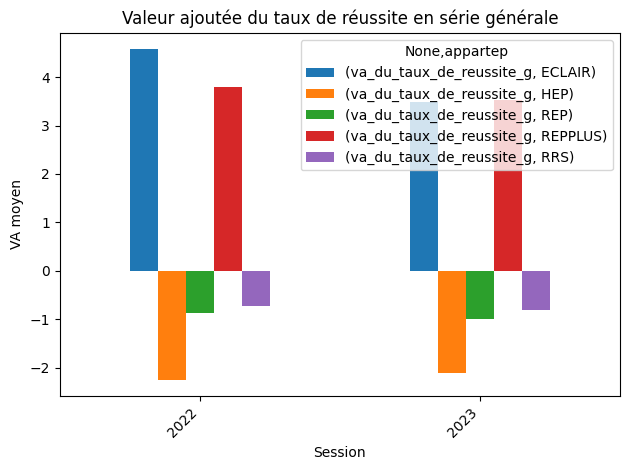

In [17]:
#Indicateurs de valeur ajoutée des collèges (2022-2023) en termes de réussite du brevet
iva_appartep = pd.merge(iva,c_EP_appartep_unique, how='left', on='uai')
iva_appartep = iva_appartep[['uai','session',
                            'appartep',
                            'taux_de_reussite_g',     #Taux de réussite observé en série générale
                            'va_du_taux_de_reussite_g',#Valeur ajoutée du taux de réussite en série générale (si positive mieux reussi que l'attendu)
                            'nb_mentions_global_g']]   #Nombre global de mentions en série générale
iva_appartep

va_appartep_moyen = iva_appartep.groupby(['session','appartep'])[['va_du_taux_de_reussite_g']].mean().unstack()
va_appartep_moyen

#Graphique

plt.figure(figsize=(10, 6))
va_appartep_moyen.plot(kind='bar')
plt.title('Valeur ajoutée du taux de réussite en série générale')
plt.xlabel('Session')
plt.ylabel('VA moyen')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
va_appartep_moyen

D’après le graphique 5, on constate surtout une différence de la valeur ajoutée du taux de réussite entre les collèges classés HEP, REP et REPPLUS. Par exemple, en 2023, les collèges HEP ont une valeur ajoutée du taux de réussite de 5.64 points inférieure à celle des collèges REPPLUS.

Cette différence peut indiquer des efforts accrus ou des changements positifs dans les pratiques éducatives des collèges REPPLUS, et des difficultés rencontrées par les établissements HEP dans le maintien ou l'amélioration des résultats scolaires des élèves.

S’agissant de l’approche contextuelle, une analyse de l’indice de position sociale (IPS) permet d'appréhender le statut social des élèves à partir des professions et catégories sociales (PCS) de leurs parents. Plus l’IPS est haut, plus l’élève évolue dans un contexte familial favorable à sa réussite scolaire. L’écart type de l’IPS indique l’hétérogénéité sociale d’un établissement : plus il est élevé, plus le profil social des élèves est diversifié.


<Figure size 1000x600 with 0 Axes>

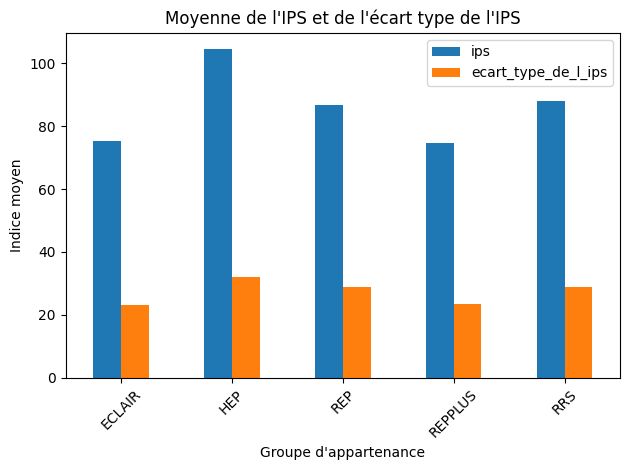

In [18]:
#Indices de position sociale dans les collèges (rentrée scolaire 2022-2023)
#selection des indicateurs
ips_ind = ips[['ips', #Plus cet indice est haut, plus l’élève évolue dans un contexte familial favorable à sa réussite scolaire
               'ecart_type_de_l_ips']] #indice d’hétérogénéité sociale d’un établissement. Plus il est élevé, plus le profil social des élèves est diversifié

ips_ind = pd.merge(ips_ind,c_EP_appartep_unique, how='left', on='uai')
ips_ind

#Pyenne de ips et de ecart_type_de_l_ips par appartep
ips_ind_moyen = ips_ind.groupby('appartep')[['ips', 'ecart_type_de_l_ips']].mean()

#Graphique
plt.figure(figsize=(10, 6))
ips_ind_moyen.plot(kind='bar')
plt.title('Moyenne de l\'IPS et de l\'écart type de l\'IPS')
plt.xlabel('Groupe d\'appartenance')
plt.ylabel('Indice moyen')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Dur le graphique 6, il est possible de constater une différence sur ces deux indicateurs entre les collèges classés HEP et REP ou REP+, avec des valeurs de l’IPS plus favorable pour les collèges HEP.

## 2.	Impact du Classement « Éducation Prioritaire » sur les Performances Scolaires

### i.	Différences en différences (DID)

L'analyse en DID (Difference-in-Differences) est une méthode économétrique couramment utilisée pour évaluer l'impact causal d'une intervention ou d'un traitement sur un groupe de traitement par rapport à un groupe de contrôle. Dans ce contexte, l'indicateur de performance utilisé est le taux de réussite au brevet, en raison de sa disponibilité étendue sur les données disponibles.

Sur les choix méthodologiques, il convient d’analyser un échantillon de collèges qui n'étaient pas classés en Réseau d'Éducation Prioritaire (REP) avant une certaine année (en l’occurrence l’année 2015 lié aux dates de réformes importantes), mais qui l’ont été classés depuis. Les résultats de ces collèges sont donc comparés à ceux qui n'ont pas changé de statut. 

L'analyse DID (Difference-in-Differences) effectuée utilise une régression linéaire (méthode des moindres carrés ordinaire) pour évaluer l'impact causal de l'intervention (ici, le classement en « éducation prioritaire ») sur le taux de réussite.


In [19]:
#Identification des collèges éducation prioritaire
EP_appartep = c_EP[['numero_uai', 'rs','appartep']].rename(columns={'numero_uai': 'uai'})

EP_appartep

EP_appartep['prioritaire'] = EP_appartep['appartep'].apply(lambda x: 'non' 
                                                  if x in ['HEP'] 
                                                  else 'oui' 
                                                  if x in ['REP', 'REPPLUS','ECLAIR', 'RRS'] 
                                                  else 'autre')

#Filtre pour sélection d'un échantillon de colleges qui n'était pas pas EP avant 2014 et qui le sont devenus
EP_filtre = EP_appartep[(EP_appartep['prioritaire'] == 'oui') & (EP_appartep['rs'] > 2014) &
                 (~EP_appartep['uai'].isin(EP_appartep[(EP_appartep['rs'] < 2014) & (EP_appartep['prioritaire'] == 'non')]['uai']))]
EP_filtre


#Pour permettre le calcul, du DID il faut donner des valeurs pour pour le collèges "EP" avant 2015
#selectionner la liste les uai "oui"
uai_list = EP_filtre['uai']
uai_list.to_list()

#Données 'non' à ajouter dans le dataframe
data = {
    'rs': [2011, 2012, 2013, 2014],
    'appartep': ['HEP', 'HEP', 'HEP', 'HEP'],
    'prioritaire': ['oui', 'oui', 'oui', 'oui'] 
}

#Créer un nouveau dataframe
base_df = pd.DataFrame(data)

#Initialiser le dataframe
result_df = pd.DataFrame()

#Répéter valeur pour chaque "uai" dans la liste
for uai in uai_list:
    temp_df = base_df.copy() 
    temp_df['uai'] = uai     
    result_df = pd.concat([result_df, temp_df], ignore_index=True)

#Concatener avec la liste initiale des oui pour la période 2015 à 2019
result_df = pd.concat([result_df, EP_filtre], ignore_index=True)

#selection du groupe contrôle (ceux qui ont jamais été prioritaire)
EP_non = EP_appartep[(EP_appartep['prioritaire'] == 'non')]

ep_concat = pd.concat([result_df,EP_non])

# Preparer base performance : diplôme national du brevet par établissement
performance = brevet_appartep_clean[['uai','session','taux_de_reussite']]

# Renommer les colonnes
performance.rename(columns={
    'session': 'rs'}, inplace=True)

#Fusionner la liste des colleges "oui" et "non" et la performance ("taux de reussite")
did = pd.merge(ep_concat,performance, how='left', on=['uai', 'rs'])
did = did.dropna()

/var/folders/3l/d21zqzx14y59bw8rlhhx1ldw0000gn/T/ipykernel_67265/1343541212.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performance.rename(columns={


Modelisation Différences en différences (DID)

In [20]:
# Transformer les variables catégorielles en variables indicatrices
did['Traitement'] = (did['prioritaire'] == 'oui').astype(int)
did['Post'] = (did['rs'] > 2015).astype(int)
did['Traitement_Post'] = did['Traitement'] * did['Post']

#Spécifier le modèle DID
model = sm.OLS(did['taux_de_reussite'], sm.add_constant(did[['Traitement', 'Post', 'Traitement_Post']]))
results = model.fit()

#Afficher les résultats
print(results.summary()) #Constats : Traitement_Post = coef 1.3888 / P>|t|0.000 donc statistiquement sigiificatif


                            OLS Regression Results                            
Dep. Variable:       taux_de_reussite   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     8522.
Date:                Wed, 16 Jul 2025   Prob (F-statistic):               0.00
Time:                        22:34:51   Log-Likelihood:            -2.0892e+05
No. Observations:               59467   AIC:                         4.178e+05
Df Residuals:                   59463   BIC:                         4.179e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              84.7371      0.056   15

En moyenne, le classement en « éducation prioritaire » a entraîné une augmentation de 1.38% du taux de réussite par rapport aux collèges hors éducation prioritaire. La statistique F sur ce modèle est très élevée avec une p-valeur de 0.00, indiquant qu’il est, dans son ensemble, statistiquement significatif.

L'analyse DID révèle alors que l'intervention a eu un impact positif et statistiquement significatif sur le taux de réussite des collèges en éducation prioritaire après l'intervention, bien que cet effet soit relativement modeste (augmentation de 1.38%). 

Le graphique 7 ci-après aide à apprécier la « différence » moyenne sur le taux de réussite pour les collèges classés et non classés avant et après l’année de référence.

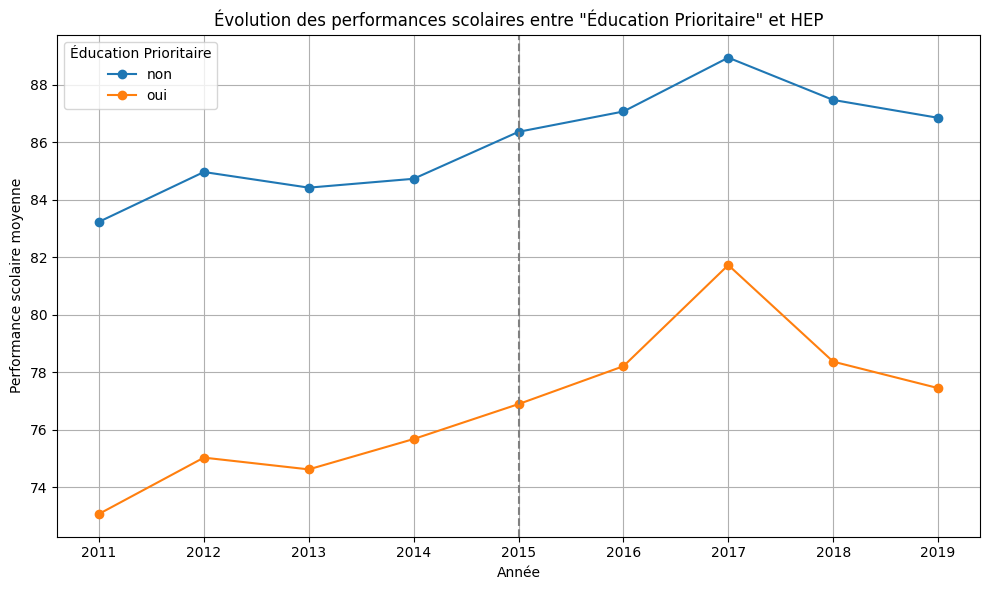

In [21]:
#Grouper les valeurs
did_grouped = did.groupby(['rs', 'prioritaire'])['taux_de_reussite'].mean().reset_index()

# Création d'un graphique pour visualiser les performances scolaires
plt.figure(figsize=(10, 6))

#Séparer les données par traitement
groupes = did_grouped.groupby('prioritaire')

#En fonction du groupe
for key, group in groupes:
    # Utilisation des valeurs de 'rs' et 'taux_de_reussite' pour chaque groupe
    plt.plot(group['rs'], group['taux_de_reussite'], marker='o', linestyle='-', label=key)

#Mise en page
plt.title('Évolution des performances scolaires entre "Éducation Prioritaire" et HEP')
plt.xlabel('Année')
plt.ylabel('Performance scolaire moyenne')
plt.legend(title='Éducation Prioritaire')

#Ajouter une ligne pour indiquer le début du traitement
plt.axvline(x=2015, color='gray', linestyle='--')

plt.grid(True)
plt.tight_layout()
plt.show()

Si les résultats montrent un effet sur la performance scolaire des collèges classés « prioritaires », une exploration plus approfondie pourrait inclure des tests sur différentes périodes de référence ainsi qu’une prise en compte d'autres variables pertinentes liées à la performance. 

### ii.	Régression

Une analyse sur des facteurs explicatifs peut compléter la question posée initialement. La régression linéaire permet de mettre en évidence les liens statistiquement significatifs entre deux variables. Dans cette étude, l’analyse repose, pour chaque groupe d’appartenance des collèges, sur le lien entre le taux de réussite au brevet en 2022 et l’indice de position social (IPS) de la rentrée scolaire de 2022-2023. Un deuxième modèle inclut également l'écart type de l'IPS pour affiner la compréhension des influences socio-économiques sur les performances scolaires.

In [22]:
#Analyse de regression entre la performance et l'indice de position social pour l'année 2022

#Sélection des variables nécessaires (performance)
reussite_iva = iva_appartep[['uai','taux_de_reussite_g','session']]
reussite_iva_22 = reussite_iva[reussite_iva['session'] == 2022]

#Fusion avec base IPS
ips_perf = pd.merge(reussite_iva_22, ips_ind, how='left', on=['uai'])
ips_perf = ips_perf.dropna()


In [23]:
#Modèle 1 : Régression avec ips comme variable explicative
X_model_1 = sm.add_constant(ips_perf['ips'])
y_model_1 = ips_perf['taux_de_reussite_g']
model_1 = sm.OLS(y_model_1, X_model_1).fit()

print(model_1.summary())



                            OLS Regression Results                            
Dep. Variable:     taux_de_reussite_g   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     1859.
Date:                Wed, 16 Jul 2025   Prob (F-statistic):               0.00
Time:                        22:34:52   Log-Likelihood:                -17032.
No. Observations:                5164   AIC:                         3.407e+04
Df Residuals:                    5162   BIC:                         3.408e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.3466      0.623     96.878      0.0

In [24]:
#Modèle 2 : Régression avec ips et ecart_type_de_l_ips comme variables explicatives
X_model_2 = sm.add_constant(ips_perf[['ips', 'ecart_type_de_l_ips']])
y_model_2 = ips_perf['taux_de_reussite_g']
model_2 = sm.OLS(y_model_2, X_model_2).fit()

print(model_2.summary())


                            OLS Regression Results                            
Dep. Variable:     taux_de_reussite_g   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     943.0
Date:                Wed, 16 Jul 2025   Prob (F-statistic):               0.00
Time:                        22:34:52   Log-Likelihood:                -17022.
No. Observations:                5164   AIC:                         3.405e+04
Df Residuals:                    5161   BIC:                         3.407e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  61.6424    

Une analyse sur des facteurs explicatifs peut compléter la question posée initialement. La régression linéaire permet de mettre en évidence les liens statistiquement significatifs entre deux variables. Dans cette étude, l’analyse repose, pour chaque groupe d’appartenance des collèges, sur le lien entre le taux de réussite au brevet en 2022 et l’indice de position social (IPS) de la rentrée scolaire de 2022-2023. Un deuxième modèle inclut également l'écart type de l'IPS pour affiner la compréhension des influences socio-économiques sur les performances scolaires.

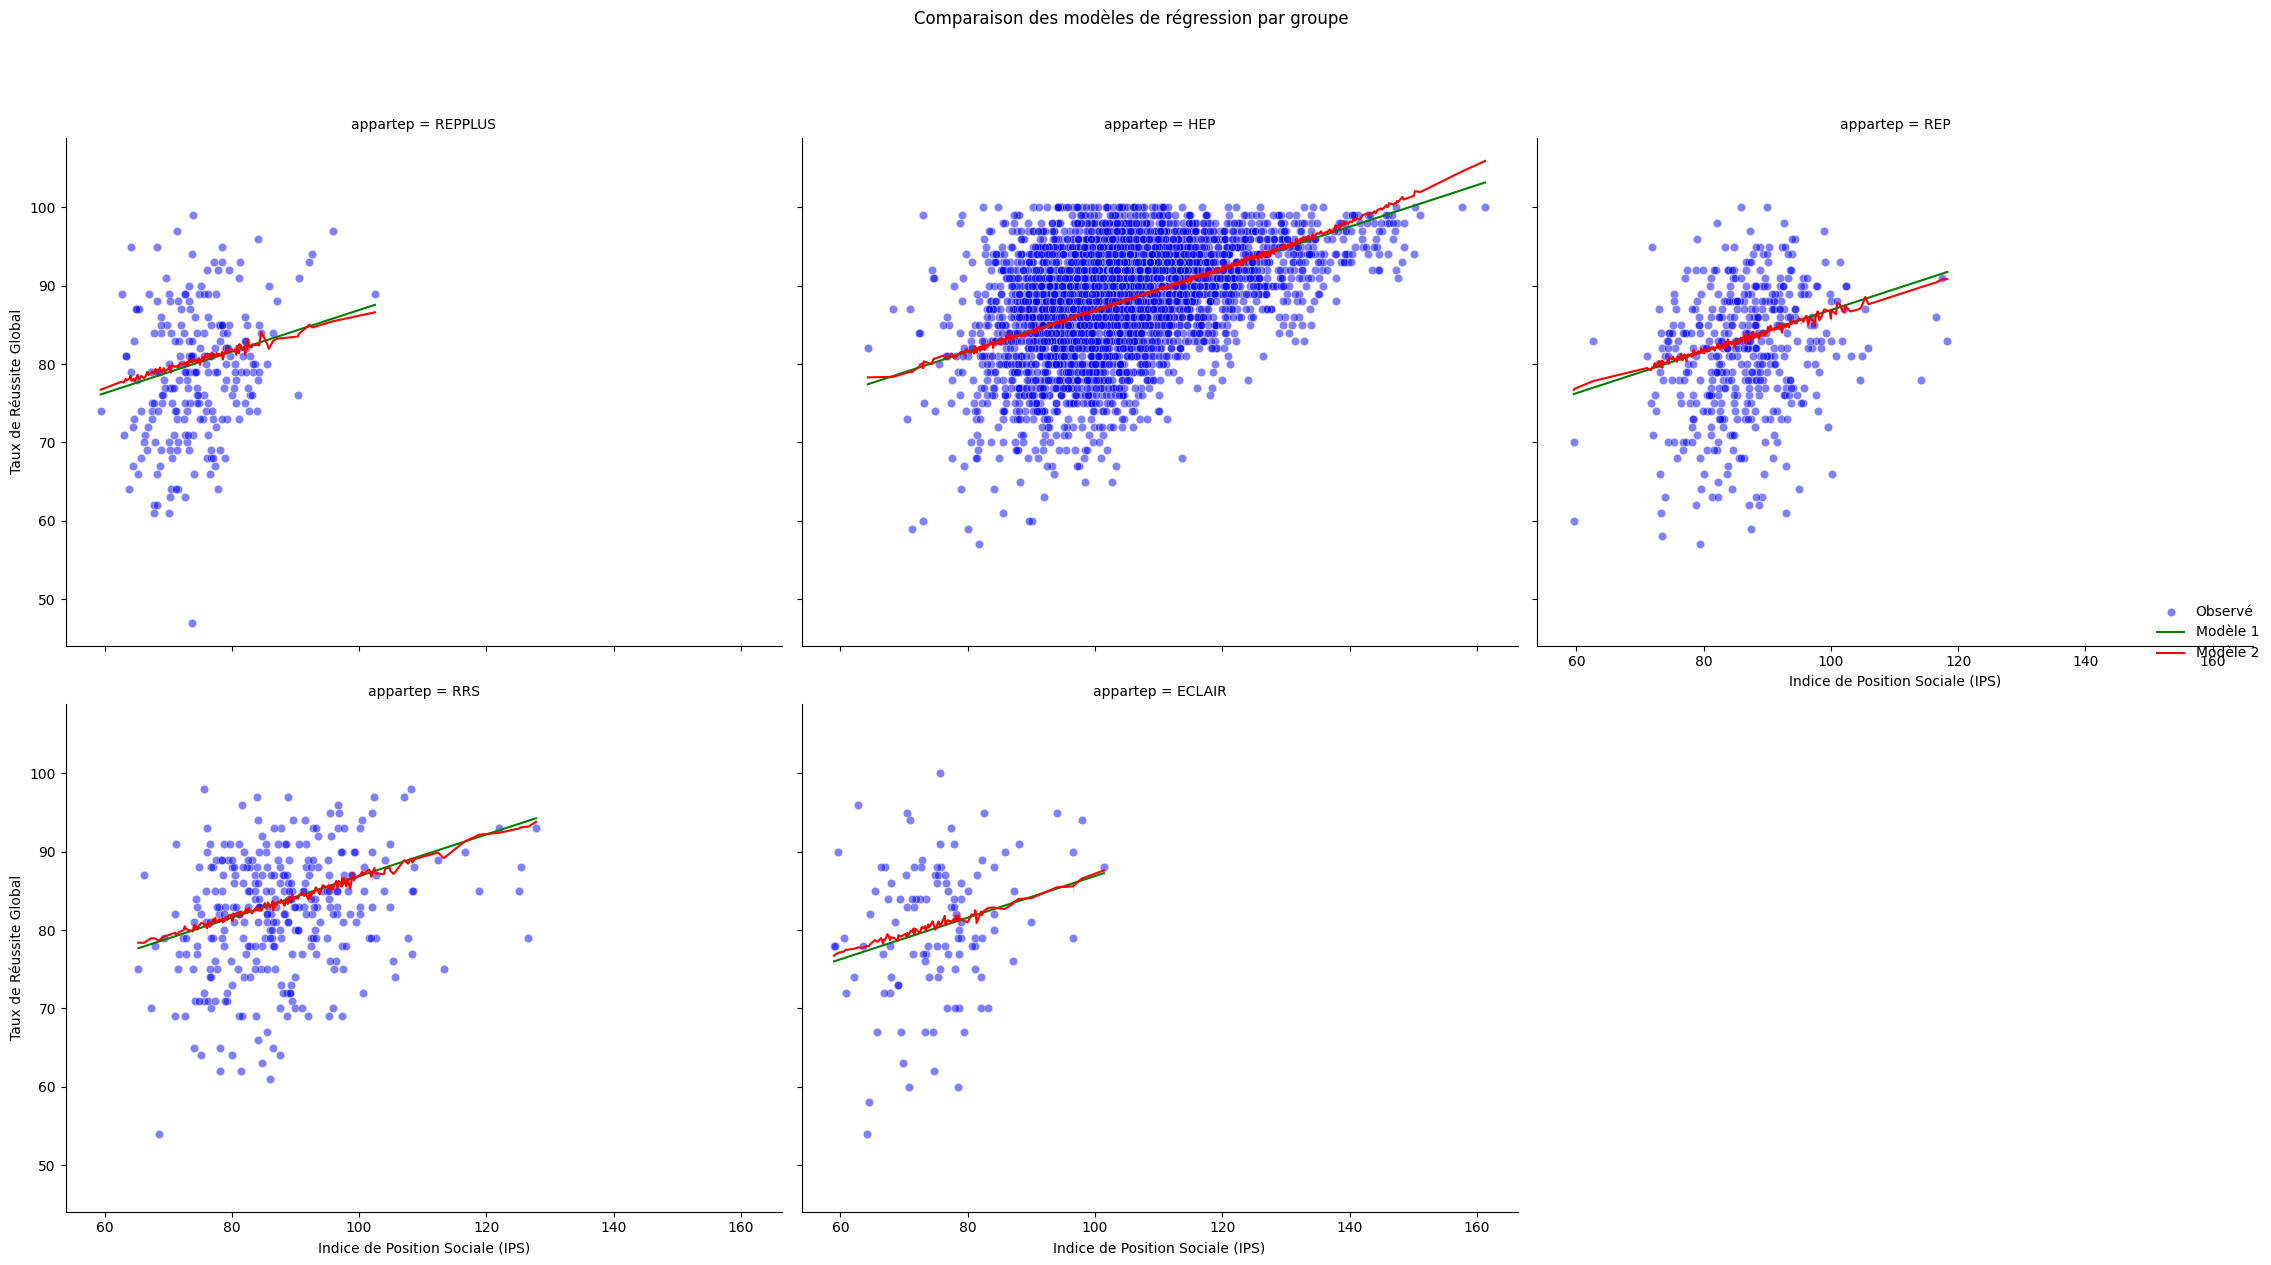

In [25]:
#Grid pour comparer les modèles en fonction du groupe
g = sns.FacetGrid(ips_perf, col='appartep', height=6, aspect=1.2, col_wrap=3)
g.map(sns.scatterplot, 'ips', 'taux_de_reussite_g', color='blue', alpha=0.5, label='Observé')
# Ajouter les prédictions des deux modèles à ips_perf
ips_perf['predicted_model_1'] = model_1.predict(sm.add_constant(ips_perf['ips']))
ips_perf['predicted_model_2'] = model_2.predict(sm.add_constant(ips_perf[['ips', 'ecart_type_de_l_ips']]))

# Tracer les lignes de régression pour chaque groupe
g.map(sns.lineplot, 'ips', 'predicted_model_1', color='green', label='Modèle 1')
g.map(sns.lineplot, 'ips', 'predicted_model_2', color='red', label='Modèle 2')
g.set_axis_labels('Indice de Position Sociale (IPS)', 'Taux de Réussite Global')
g.add_legend()
plt.suptitle('Comparaison des modèles de régression par groupe', y=1.05)
plt.tight_layout()
plt.show()

Les deux modèles s’avèrent statistiquement significatifs. Le modèle 2 (ligne verte sur les graphiques), en particulier, permet d’observer qu’une augmentation de 1 unité de l'IPS est associée à une augmentation de 0.29 points du taux de réussite global, toutes choses étant égales par ailleurs. En revanche, une augmentation de 1 unité de l'écart type de l'IPS est associée à une diminution de 0.12 points du taux de réussite global.

Sur les tendances générales du modèle, on peut conclure qu’un IPS plus élevé, indicatif d’un statut socio-économique plus élevé, est associé à de meilleurs résultats scolaires ; une plus grande hétérogénéité dans le statut socio-économique des élèves au sein d'un collège est associée à des résultats scolaires inférieurs.


## C.	Limites et perspectives

L'analyse en Différence de Différences (DID) repose sur l'hypothèse que les tendances des groupes de traitement et de contrôle auraient été parallèles en l'absence d’intervention, ce qui peut être difficile à vérifier. En outre, les variations locales et contextuelles peuvent influencer les résultats, rendant l'isolement de l'effet spécifique de l’intervention plus complexe. Il est aussi difficile d’isoler les analyses de la présence de facteurs externes, telle que l’impact des reformes intervenues. 
Par ailleurs, certains paramètres, tels que les faibles coefficients de corrélation et les tests de normalité des résidus, suggèrent que d'autres facteurs importants pourraient ne pas être pris en compte dans ce modèle. Ainsi, des analyses supplémentaires sont nécessaires pour une évaluation plus complète. Par exemple, il serait intéressant d’évaluer la performance à travers l'analyse de l'indice de valeur ajoutée (IVA) ou de prendre en compte la localisation géographique des établissements.
Concernant la régression linéaire, bien que le modèle montre une association entre l'IPS et le taux de réussite, il ne prouve pas nécessairement une relation causale.
